# Avaliação dos algotmos de classificação

## Tuning dos parâmetros com GridSearch 

### Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier #árovore de decisão
from sklearn.ensemble import RandomForestClassifier #Random ferest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LogisticRegression #Regressão logistica
from sklearn.svm import SVC #SVM
from sklearn.neural_network import MLPClassifier #Redes Neurais
import numpy as np
import pandas as pd

In [2]:
import pickle 
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [6]:
x_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [7]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Árvore de Decisão

In [9]:
parametros = {'criterion':['gini', 'entropy'], 
              'splitter':['best', 'random'], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf':[1, 5, 10]}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## Random forest

In [11]:
parametros = {'criterion':['gini', 'entropy'], 
              'n_estimators':[10, 40, 100, 150], 
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf':[1, 5, 10]}

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


## Knn

In [13]:
parametros = {'n_neighbors':[3, 5, 10, 20], 
              'p':[1, 2]}

In [14]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## Regressão logística

In [15]:
parametros = {'tol':[0.0001, 0.00001, 0.000001],
              'C':[1.0, 1.5, 2.0],
              'solver':['lbfgs', 'sag', 'saga']}

In [16]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


## SVM

In [17]:
parametros = {'tol':[0.001, 0.0001, 0.00001],
              'C':[1.0, 1.5, 2.0],
              'kernel':['rbf', 'linear', 'poly', 'sigmoid']}

In [18]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


## Redes Neurais

In [19]:
parametros = {'activation':['relu', 'logistic', 'tahn'],
              'solver':['adam', 'sgd'],
              'batch_size':[10, 56]}

In [20]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\A

In [21]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9964999999999999


## Validação Cruzada

In [22]:
from sklearn.model_selection import cross_val_score, KFold

In [23]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv = kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel = 'rbf', C = 2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv = kfold)
    resultados_rede_neural.append(scores.mean())

C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\olive\A

In [24]:
resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural 

([0.9864999999999998,
  0.9844999999999999,
  0.9905000000000002,
  0.9879999999999999,
  0.9884999999999999,
  0.9890000000000001,
  0.9880000000000001,
  0.9875,
  0.9860000000000001,
  0.9875,
  0.9860000000000001,
  0.9899999999999999,
  0.9889999999999999,
  0.9864999999999998,
  0.983,
  0.9864999999999998,
  0.9855,
  0.9904999999999999,
  0.9875,
  0.9869999999999999,
  0.983,
  0.9865,
  0.9889999999999999,
  0.9869999999999999,
  0.9880000000000001,
  0.9880000000000001,
  0.9879999999999999,
  0.9855,
  0.9864999999999998,
  0.9880000000000001],
 [0.9829999999999999,
  0.9855,
  0.9815000000000002,
  0.982,
  0.9854999999999998,
  0.9835,
  0.9875,
  0.9839999999999998,
  0.9834999999999999,
  0.9864999999999998,
  0.9824999999999999,
  0.9834999999999999,
  0.986,
  0.9845,
  0.9875,
  0.9799999999999999,
  0.9804999999999999,
  0.9845,
  0.9834999999999999,
  0.984,
  0.986,
  0.9824999999999999,
  0.9865,
  0.9809999999999999,
  0.9824999999999999,
  0.984,
  0.9800000000

In [25]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9865,0.9830,0.9815,0.9475,0.9845,0.9970
1,0.9845,0.9855,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9815,0.9795,0.9470,0.9865,0.9970
3,0.9880,0.9820,0.9780,0.9460,0.9850,0.9965
4,0.9885,0.9855,0.9820,0.9465,0.9850,0.9970
5,0.9890,0.9835,0.9780,0.9465,0.9845,0.9975
6,0.9880,0.9875,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9840,0.9800,0.9480,0.9850,0.9970
8,0.9860,0.9835,0.9795,0.9465,0.9840,0.9975
9,0.9875,0.9865,0.9820,0.9465,0.9845,0.9970


In [26]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.983500,0.980050,0.947000,0.985083,0.997033
std,0.001846,0.002330,0.001533,0.000743,0.001280,0.000472
min,0.983000,0.978500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.982125,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985250,0.981000,0.947500,0.986375,0.997000
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [27]:
resultados.var()

Arvore           3.409195e-06
Random forest    5.431034e-06
KNN              2.350862e-06
Logistica        5.517241e-07
SVM              1.639368e-06
Rede neural      2.229885e-07
dtype: float64

In [28]:
(resultados.std()/resultados.mean())*100

Arvore           0.187028
Random forest    0.236956
KNN              0.156446
Logistica        0.078435
SVM              0.129977
Rede neural      0.047362
dtype: float64

### Teste de normalidade nos resultados

Será utilizado o teste de Shapiro.

In [29]:
from scipy.stats import shapiro
alpha = 0.05

In [30]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9579329346063529, pvalue=0.27402928862596887),
 ShapiroResult(statistic=0.976162112446686, pvalue=0.7169371674032482),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.8699913848730289, pvalue=0.0016744852728814152))

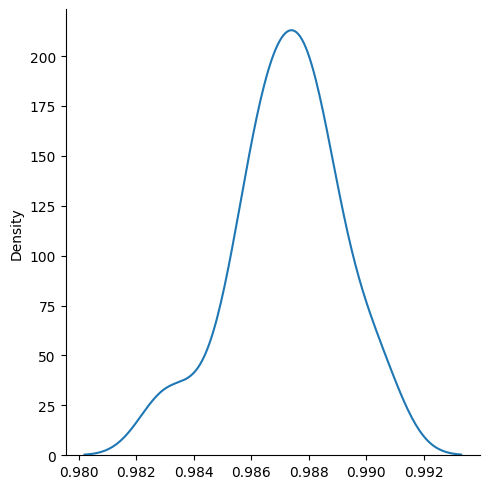

In [31]:
import seaborn as sns
sns.displot(resultados_arvore, kind = 'kde');

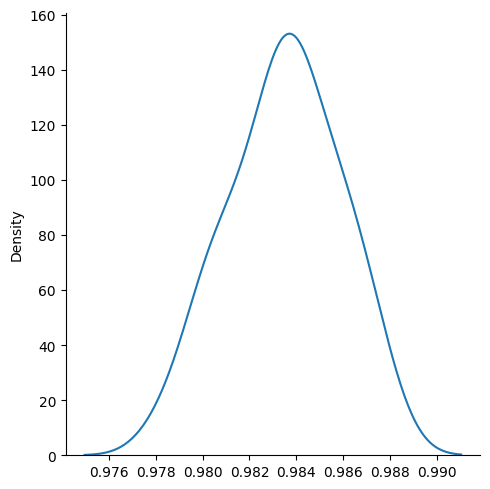

In [32]:
sns.displot(resultados_random_forest, kind = 'kde')

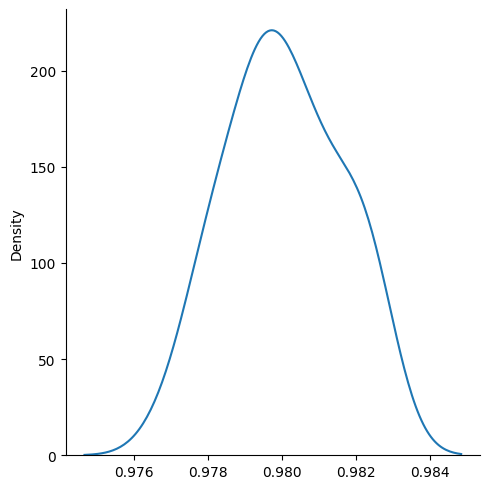

In [33]:
sns.displot(resultados_knn, kind = 'kde')

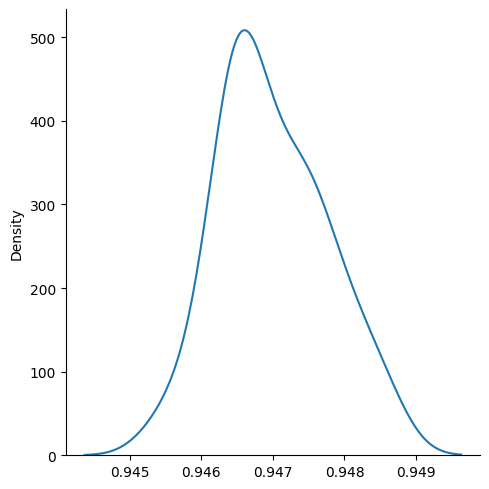

In [34]:
sns.displot(resultados_logistica, kind = 'kde')

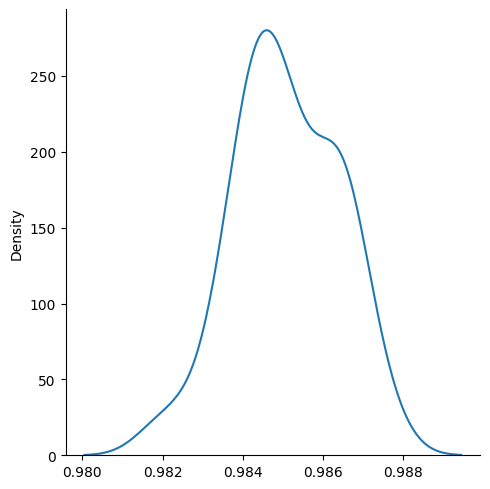

In [35]:
sns.displot(resultados_svm, kind='kde')

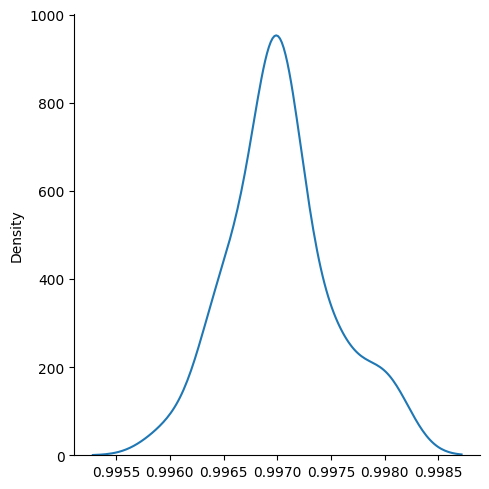

In [36]:
sns.displot(resultados_rede_neural, kind = 'kde')

## Teste de hipótese com ANOVA e Tukey

In [37]:
from scipy.stats import f_oneway

In [38]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.8152192250997047e-176

In [39]:
alpha = 0.05
if p<= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [40]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [41]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9885,arvore
...,...,...
175,0.9980,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [42]:
from statsmodels.stats.multicomp import MultiComparison

In [43]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [44]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0072   0.0 -0.0083 -0.0061   True
       arvore     logistica  -0.0402   0.0 -0.0414 -0.0391   True
       arvore random_forest  -0.0037   0.0 -0.0049 -0.0026   True
       arvore   rede_neural   0.0098   0.0  0.0087  0.0109   True
       arvore           svm  -0.0022   0.0 -0.0033  -0.001   True
          knn     logistica   -0.033   0.0 -0.0342 -0.0319   True
          knn random_forest   0.0035   0.0  0.0023  0.0046   True
          knn   rede_neural    0.017   0.0  0.0159  0.0181   True
          knn           svm    0.005   0.0  0.0039  0.0062   True
    logistica random_forest   0.0365   0.0  0.0354  0.0376   True
    logistica   rede_neural     0.05   0.0  0.0489  0.0512   True
    logistica           svm   0.0381   0.0   0.037  0.0392   True
random_for

In [45]:
resultados.mean()

Arvore           0.987233
Random forest    0.983500
KNN              0.980050
Logistica        0.947000
SVM              0.985083
Rede neural      0.997033
dtype: float64

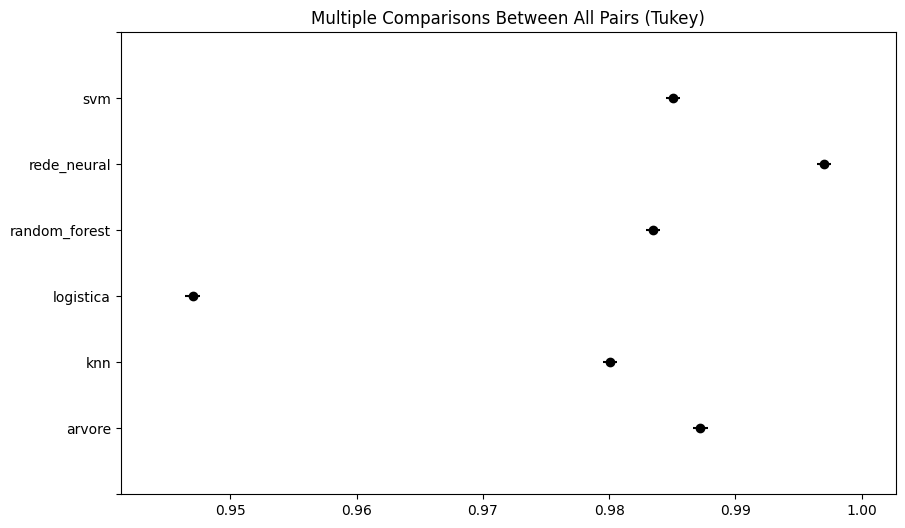

In [46]:
teste_estatistico.plot_simultaneous();

## Salvar um classificador já treinado

In [47]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [49]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [50]:
x_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [51]:
classificador_rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
classificador_rede_neural.fit(x_credit, y_credit)

C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [52]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 1, min_samples_split = 5, splitter = 'best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [53]:
classificador_svm = SVC(C = 2.0, kernel = 'rbf')
classificador_svm.fit(x_credit, y_credit)

SVC(C=2.0)

In [54]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar um Classificador já treinado

In [58]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [59]:
novo_registro = x_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [60]:
novo_registro.shape

(3,)

In [63]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [64]:
rede_neural.predict(novo_registro)

array([0], dtype=int64)

In [65]:
arvore.predict(novo_registro)

array([0], dtype=int64)

In [66]:
svm.predict(novo_registro)

array([0], dtype=int64)